In [1]:
!pip install -qq google-play-scraper

In [2]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid',palette='muted',font_scale=1.2)

In [5]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp'
  
]

In [6]:
len(app_packages)

5

In [7]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


In [8]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [9]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "categories": [
    {
      "id": "PRODUCTIVITY",
      "name": "Productivity"
    }
  ],
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 40M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, a planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do lis

In [10]:
type(app_infos)

list

In [11]:
app_info_df= pd.DataFrame(app_infos)

In [12]:
app_info_df.head()

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,appId,url
0,Any.do - To do list & Calendar,"🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,30385350,4.398699,485658,36047,...,Everyone,None,False,False,"Nov 10, 2011","Jun 30, 2024",1719732827,Varies with device,com.anydo,https://play.google.com/store/apps/details?id=...
1,Todoist: to-do list & planner,"Trusted by over 42 million people, Todoist sim...","Trusted by over 42 million people, Todoist sim...","Simple yet powerful to-do list, habit tracker ...","10,000,000+",10000000,41360186,4.424413,267578,16095,...,Everyone,None,False,False,"Nov 18, 2012","Aug 1, 2024",1722500823,Varies with device,com.todoist,https://play.google.com/store/apps/details?id=...
2,TickTick:To Do List & Calendar,🥇 Great to-do list app for new Android device ...,🥇 Great to-do list app for new Android device ...,Your second brain for organizing your life: to...,"5,000,000+",5000000,7354348,4.620474,131431,6959,...,Everyone,None,False,False,"Jun 19, 2013","Jul 25, 2024",1721904820,Varies with device,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Habitica is a free habit-building and producti...,Habitica is a free habit-building and producti...,Treat your life like a game to stay motivated ...,"5,000,000+",5000000,5498354,4.726764,43692,3251,...,Everyone,None,True,True,"Dec 10, 2015","Jun 25, 2024",1719329803,Varies with device,com.habitrpg.android.habitica,https://play.google.com/store/apps/details?id=...
4,Forest: Focus for Productivity,Can't stop scrolling? Lack of self-control? Fo...,Can&#39;t stop scrolling? Lack of self-control...,Stay focused on your goal or to dos and get mo...,"10,000,000+",10000000,36670343,4.672000,680007,9054,...,Everyone,None,True,True,"Aug 25, 2014","Jul 11, 2024",1720683303,4.77.4,cc.forestapp,https://play.google.com/store/apps/details?id=...


In [13]:
app_info_df.to_csv('apps.csv', index=None, header=True)

In [14]:
app_reviews = [] # Initialize an empty list app_reviews

for ap in tqdm(app_packages): # Iterate over each app package in app_packages using tqdm for a progress bar
  for score in list(range(1, 6)):# For each app package, iterate over scores from 1 to 5:
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:# For each score, iterate over two sorting orders, Sort.MOST_RELEVANT and Sort.NEWEST
      rvs, _ = reviews( # Retrieve reviews for the current app package (ap) with the specified language ('en'), 
        ap,           #--country ('us'), sorting order (sort_order), and score (score):
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:   # For each review, add a 'sortOrder' field indicating the sorting order used.
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap #Add an 'appId' field indicating the app package ID.
      app_reviews.extend(rvs) #Extend the app_reviews list with the modified reviews

100%|██████████| 5/5 [00:19<00:00,  3.82s/it]


In [15]:
print_json(app_reviews[1])

{
  "appId": "com.anydo",
  "appVersion": "5.18.0.2",
  "at": "2024-06-08 11:42:11",
  "content": "I have used this app for several years, and it has worked great for me. Within the last week, I have received several pop up ads to upgrade. This was in the middle of trying to edit my list of tasks. Very distracting. They are timed so that you cannot stop them until they finish playing. There was no notification on this change of behavior. I would no longer recommend this app",
  "repliedAt": "2024-06-09 02:56:26",
  "replyContent": "Please contact our team and we will help you regarding this under Settings-> Support.",
  "reviewCreatedVersion": "5.18.0.2",
  "reviewId": "ca11e275-f9a7-4b0a-a4d1-f2981b568a46",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 26,
  "userImage": "https://play-lh.googleusercontent.com/a/ACg8ocIzXzsW6-X07cyqIdyT5GnufOZ8xxeGdQDVeHI-l6R7dzJ1sQ=mo",
  "userName": "David Ottley"
}



In [16]:
len(app_reviews)

6000

In [17]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [18]:
app_reviews_df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,6e865ed7-6788-49cf-9810-0541068e3882,Gianna,https://play-lh.googleusercontent.com/a-/ALV-U...,The 'upgrade to premium' button is right in th...,1,2,5.18.0.2,2024-07-13 15:25:37,You can dismiss the premium option and keep us...,2024-07-14 01:30:22,5.18.0.2,most_relevant,com.anydo
1,ca11e275-f9a7-4b0a-a4d1-f2981b568a46,David Ottley,https://play-lh.googleusercontent.com/a/ACg8oc...,"I have used this app for several years, and it...",1,26,5.18.0.2,2024-06-08 11:42:11,Please contact our team and we will help you r...,2024-06-09 02:56:26,5.18.0.2,most_relevant,com.anydo
2,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,1,15,4.16.6.2,2020-07-22 06:13:10,Our team will be happy to look into it for you...,2020-07-23 09:32:02,4.16.6.2,most_relevant,com.anydo


In [19]:
!pip install -q -U watermark

In [20]:
!pip install -qq transformers

In [21]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

numpy       : 1.24.3
pandas      : 2.0.3
torch       : 2.2.2
transformers: 4.32.1



In [22]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

#sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 8,4

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

C:\Users\Karthik\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


device(type='cpu')

In [23]:
df = pd.read_csv(r"C:\Users\Karthik\OneDrive\Sem2\General\reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,6e865ed7-6788-49cf-9810-0541068e3882,Gianna,https://play-lh.googleusercontent.com/a-/ALV-U...,The 'upgrade to premium' button is right in th...,1,2,5.18.0.2,2024-07-13 15:25:37,You can dismiss the premium option and keep us...,2024-07-14 01:30:22,5.18.0.2,most_relevant,com.anydo
1,ca11e275-f9a7-4b0a-a4d1-f2981b568a46,David Ottley,https://play-lh.googleusercontent.com/a/ACg8oc...,"I have used this app for several years, and it...",1,26,5.18.0.2,2024-06-08 11:42:11,Please contact our team and we will help you r...,2024-06-09 02:56:26,5.18.0.2,most_relevant,com.anydo
2,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,1,15,4.16.6.2,2020-07-22 06:13:10,Our team will be happy to look into it for you...,2020-07-23 09:32:02,4.16.6.2,most_relevant,com.anydo
3,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",1,11,NaN,2020-12-07 23:24:40,We are not aware of any issues with randomized...,2020-12-10 02:38:20,NaN,most_relevant,com.anydo
4,4be108fd-03e4-4698-b685-ad73ebefe3e9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I was a big fan of this app, but the recent UI...",1,91,4.10.6.1,2018-11-18 07:31:49,This is very strange behavior for your reminde...,2018-11-19 10:13:30,4.10.6.1,most_relevant,com.anydo


In [24]:
df.shape

(6000, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               5999 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  5206 non-null   object
 7   at                    6000 non-null   object
 8   replyContent          4031 non-null   object
 9   repliedAt             4031 non-null   object
 10  appVersion            5206 non-null   object
 11  sortOrder             6000 non-null   object
 12  appId                 6000 non-null   object
dtypes: int64(2), object(11)
memory usage: 609.5+ KB


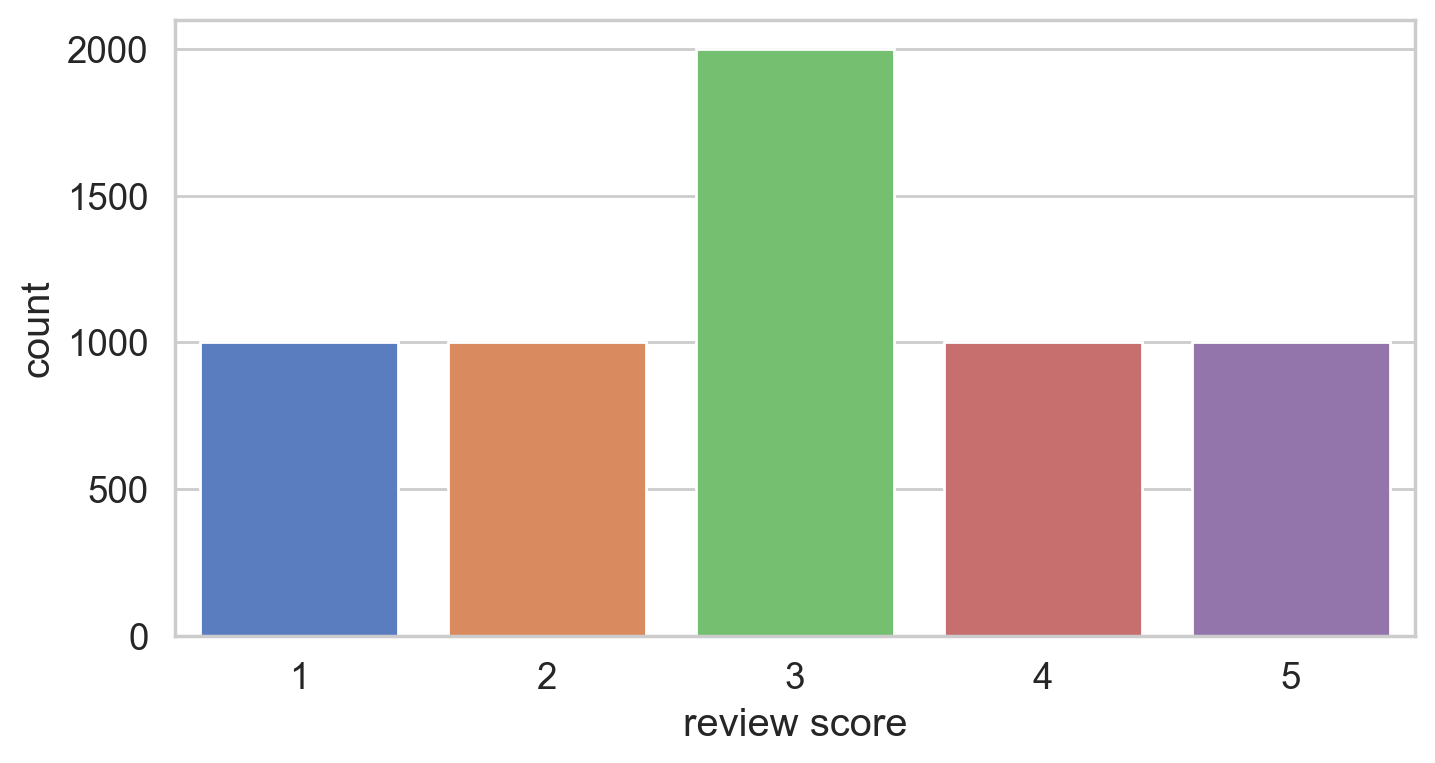

In [26]:
sns.countplot(x='score', data=df)
plt.xlabel('review score');
#rcParams['figure.figsize'] = 16,2

In [27]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

df['sentiment'] = df.score.apply(to_sentiment)

In [28]:
df['sentiment']

0       0
1       0
2       0
3       0
4       0
       ..
5995    2
5996    2
5997    2
5998    2
5999    2
Name: sentiment, Length: 6000, dtype: int64

In [29]:
class_names = ['negative', 'neutral', 'positive']

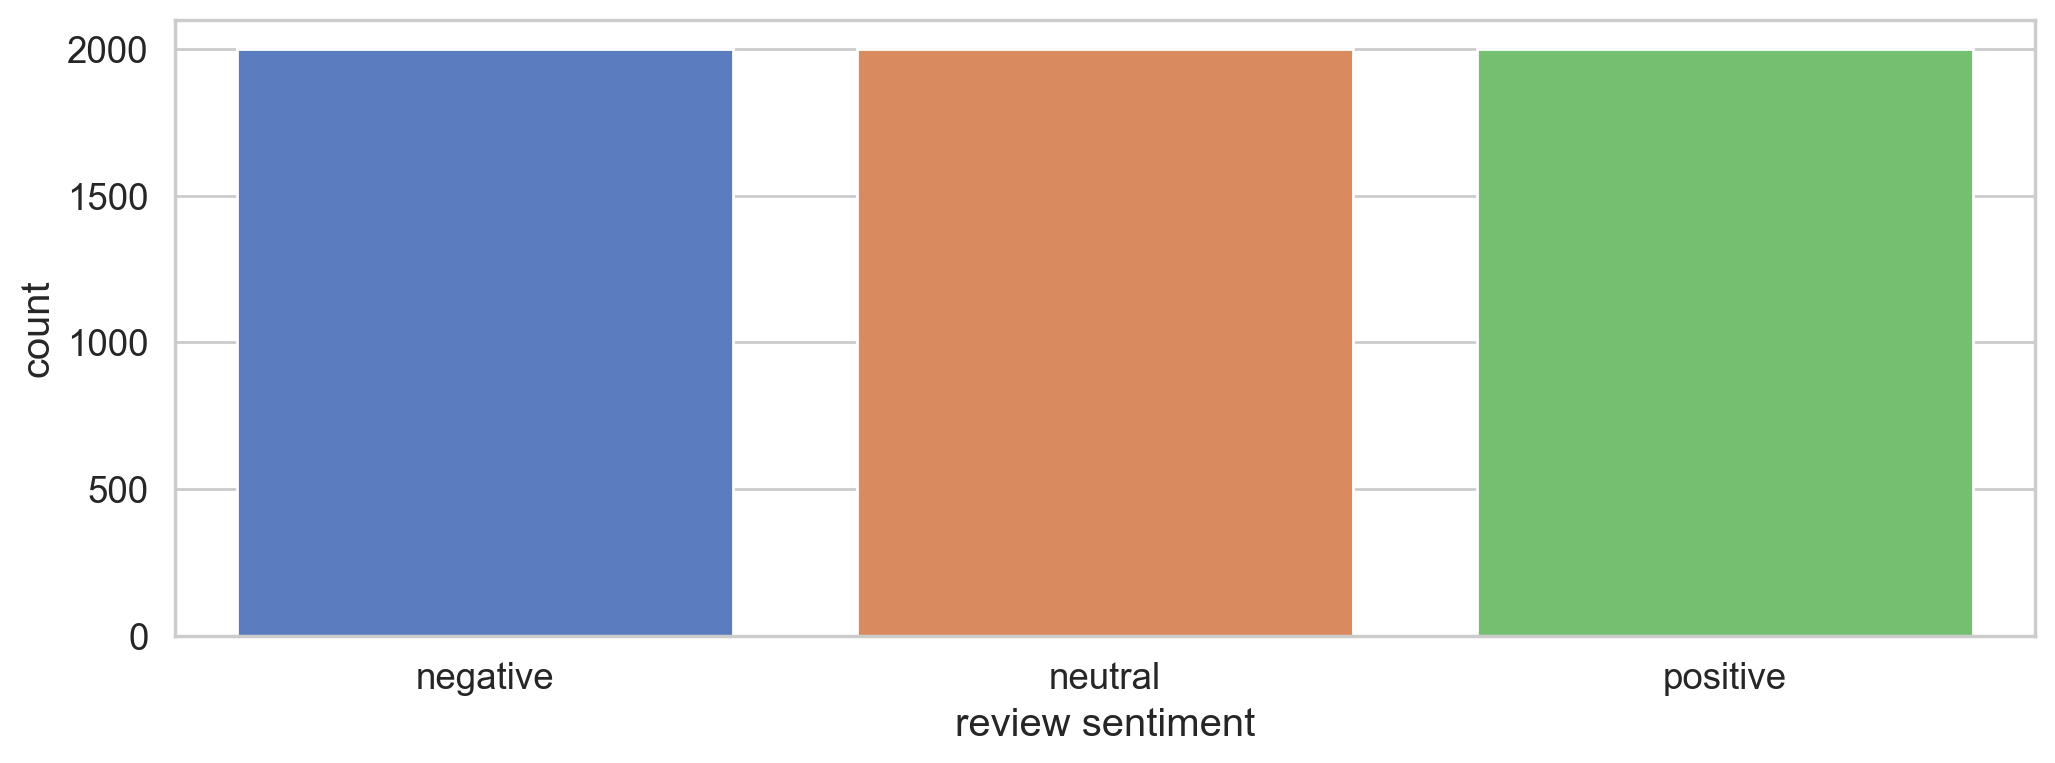

In [30]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='sentiment',data=df)
plt.xlabel('review sentiment')

ax.set_xticklabels(class_names);

In [31]:
revert_df=df

In [32]:
df.head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment
0,6e865ed7-6788-49cf-9810-0541068e3882,Gianna,https://play-lh.googleusercontent.com/a-/ALV-U...,The 'upgrade to premium' button is right in th...,1,2,5.18.0.2,2024-07-13 15:25:37,You can dismiss the premium option and keep us...,2024-07-14 01:30:22,5.18.0.2,most_relevant,com.anydo,0


In [33]:
df = df.drop(columns=['reviewId', 'userName','userImage','reviewCreatedVersion','at','repliedAt','appVersion'])

In [34]:
revert_df_1=df

In [35]:
df.head(1)

,content,score,thumbsUpCount,replyContent,sortOrder,appId,sentiment
0,The 'upgrade to premium' button is right in th...,1,2,You can dismiss the premium option and keep us...,most_relevant,com.anydo,0


In [36]:
df = df.drop(columns=['thumbsUpCount', 'replyContent','sortOrder',])

In [37]:
df.shape

(6000, 4)

In [38]:
PRE_TRAINED_MODEL_NAME = 'distilbert-base-cased'

In [39]:
from shutil import rmtree

# Path to Hugging Face cache directory
cache_dir = 'C:\\Users\\Karthik\\.cache\\huggingface\\hub\\models--distilbert-base-cased'

# Remove the cache directory (use with caution)
rmtree(cache_dir)


In [40]:
tokenizer = DistilBertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
#tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
#tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, cache_dir='./hf_cache')

C:\Users\Karthik\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

C:\Users\Karthik\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Karthik\.cache\huggingface\hub\models--distilbert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

In [41]:
df['content']=df['content'].astype(str)

In [42]:
temp=tokenizer.encode(df.content[0], max_length=512)# this is a simple encoding and this is not calling encode_plus
print(temp)
print('\nLength:')
print(len(temp))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[101, 1109, 112, 12764, 1106, 16865, 112, 6324, 1110, 1268, 1107, 1103, 2243, 1104, 1103, 3674, 1134, 1110, 1541, 17090, 119, 1135, 5279, 1166, 1103, 3087, 1768, 1451, 1159, 146, 5194, 170, 4579, 1105, 1139, 2190, 1104, 8249, 1113, 1103, 1514, 3674, 119, 1409, 146, 13440, 4882, 1106, 5194, 170, 4579, 1106, 4911, 117, 1122, 12365, 9807, 170, 15656, 1111, 130, 2312, 119, 2009, 136, 1409, 146, 8362, 4386, 2158, 1103, 15656, 117, 1122, 12365, 5279, 1139, 4579, 1106, 2052, 119, 2009, 136, 106, 1409, 178, 5194, 1106, 3725, 9331, 117, 1122, 12365, 5279, 1122, 1106, 4911, 192, 120, 130, 1821, 15656, 119, 158, 5084, 146, 2707, 1151, 1606, 1142, 12647, 1111, 1275, 1306, 111, 146, 1640, 20662, 1122, 119, 146, 112, 1325, 1178, 6166, 1213, 170, 1376, 2039, 119, 102]

Length:
131


In [43]:
token_lens = []

for txt in df.content:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

C:\Users\Karthik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


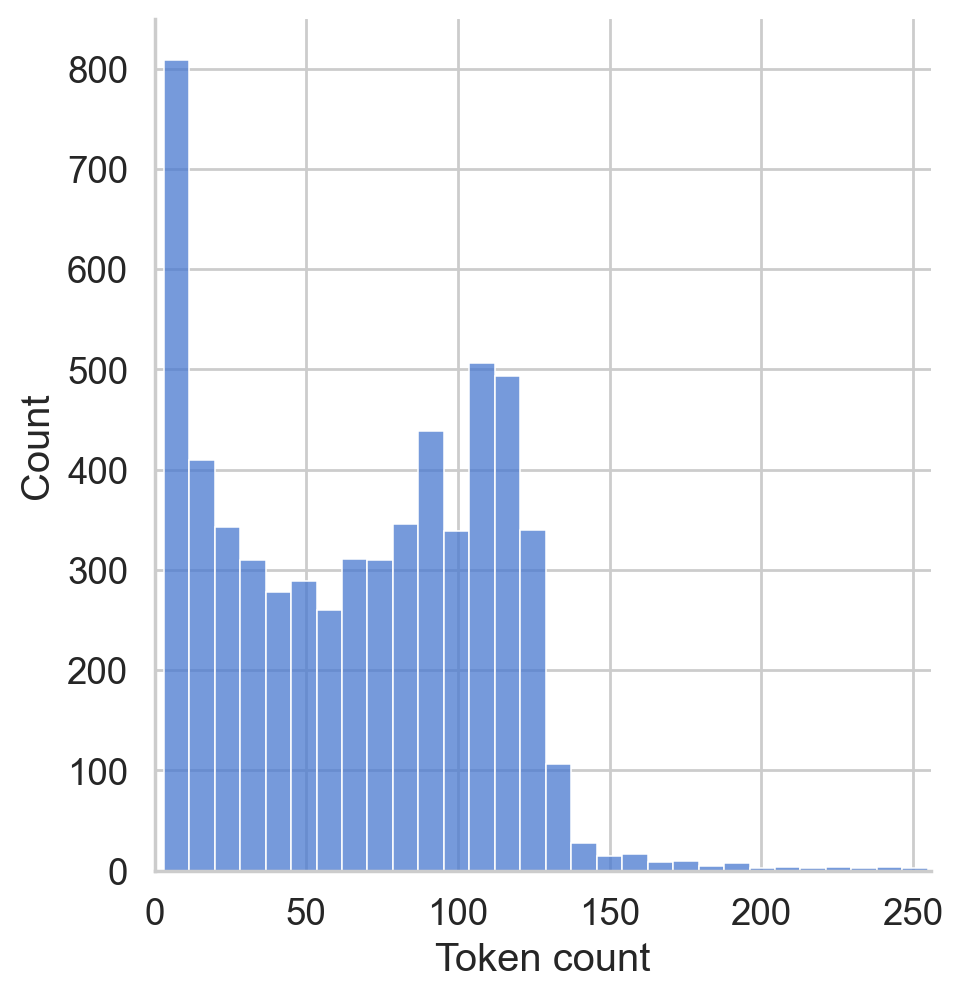

In [44]:
sns.displot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [45]:
df.shape

(6000, 4)

In [46]:
df

,content,score,appId,sentiment
0,The 'upgrade to premium' button is right in th...,1,com.anydo,0
1,"I have used this app for several years, and it...",1,com.anydo,0
2,I have the same recurring tasks to do every da...,1,com.anydo,0
3,"Instead of shopping around, I downloaded Any.d...",1,com.anydo,0
4,"I was a big fan of this app, but the recent UI...",1,com.anydo,0
...,...,...,...,...
5995,Nice,5,cc.forestapp,2
5996,അടിപൊളി 😂,5,cc.forestapp,2
5997,It is a good app for reducing distractions.,5,cc.forestapp,2
5998,So cute I love it,5,cc.forestapp,2


In [47]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [48]:
df_train.shape, df_val.shape, df_test.shape

((5400, 4), (300, 4), (300, 4))

In [49]:
def pre_tokenize_data(df, tokenizer, max_len):
    tokenized_data = {
        'input_ids': [],
        'attention_mask': [],
        'targets': []
    }

    for review, sentiment in zip(df.content, df.sentiment):
        encoding = tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        tokenized_data['input_ids'].append(encoding['input_ids'].flatten())
        tokenized_data['attention_mask'].append(encoding['attention_mask'].flatten())
        tokenized_data['targets'].append(torch.tensor(sentiment, dtype=torch.long))

    # Convert lists to tensors
    tokenized_data['input_ids'] = torch.stack(tokenized_data['input_ids'])
    tokenized_data['attention_mask'] = torch.stack(tokenized_data['attention_mask'])
    tokenized_data['targets'] = torch.stack(tokenized_data['targets'])

    return tokenized_data

In [50]:
max_len = 150
# Pre-tokenize each dataset
train_tokenized_data = pre_tokenize_data(df_train, tokenizer, max_len)
val_tokenized_data = pre_tokenize_data(df_val, tokenizer, max_len)
test_tokenized_data = pre_tokenize_data(df_test, tokenizer, max_len)

C:\Users\Karthik\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [51]:
from torch.utils.data import Dataset, DataLoader

class GPReviewDataset(Dataset):#creating a custom dataset

    def __init__(self, reviews, tokenized_data):
        self.reviews = reviews
        self.input_ids = tokenized_data['input_ids']
        self.attention_mask = tokenized_data['attention_mask']
        self.targets = tokenized_data['targets']

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, item):
        review = str(self.reviews[item])
        return {
            'review_text': self.reviews[item],
            'input_ids': self.input_ids[item],
            'attention_mask': self.attention_mask[item],
            'targets': self.targets[item]
        }

def create_data_loader(tokenized_data, reviews, batch_size, num_workers=0):#dataloader
    ds = GPReviewDataset(reviews, tokenized_data)
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=num_workers
    )


In [52]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(train_tokenized_data, df_train.content.to_numpy(), BATCH_SIZE)
val_data_loader = create_data_loader(val_tokenized_data, df_val.content.to_numpy(), BATCH_SIZE)
test_data_loader = create_data_loader(test_tokenized_data, df_test.content.to_numpy(), BATCH_SIZE)

# Example of iterating through a DataLoader
for data in train_data_loader:
    print(data)


{'review_text': ["I came back to Any.do after a while because I quite liked the Groceries feature and was even considering premium before I had the _full screen_ TRY PREMIUM NOW video.. Try being a little more subtle.. I'll go back to Todoist.", "Has been one of the best reminder app available for a long time. This most recent update messed up notifications on Android 10. They don't follow the system dark mode at all, instead you have to manually change it in the app or deal with mismatched colors. It looks ridiculous seeing a white notification background amidst other black backgrounds in dark mode. It also looks like the black is not a true black like other apps. If this isn't fixed soon, I'll be looking for a new reminder app.", "Literally the only app I've ever used where gameification was actually effective and not annoying! Actually, it *is* annoying--why can't I just choose the tree and background sound that I want? But the fact that I actually *want* those sounds that help me f

{'review_text': ["Tried nearly everything that's on the market and found TickTick to be the best to-do list/calendar out there.", 'Thanks for this app. I loved it', 'Bão 👍', "This app is easy to learn and use, and yet so powerful. Update June 1st 2024: well I tried upgrading to the pro version today so that I could get reminders. Setting a reminder didn't work for me at all. First of all The quick selections for reminder time and date were shown to be relative to today. Yet the task I wanted to be reminded about is a year away! That just seems so silly. Of course reminders should default to be near the time of the task! Then no matter how hard I tried I couldn't save", "Seems like an interesting app to achieve goals. I can't set more than a single reminder as a daily reminder. I thought I would be able to do a reminder with each task or goal. For me I want to schedule three reminders per day", "constant pop ups offering premium even when I've said I don't want it. and they pop up where

{'review_text': ["Since my first rating I have used Todoist for years. It is easy and powerful. It can be used in combination with Outlook, the email I must use at work. You can jot down quick reminders or organize complex projects or even keep detailed organized notes. You can set up filters to help you focus your work, which is very helpful. I love it and can't imagine using anything else.", 'Gud.', "Would be great if some more tools were.avaulable in the free version! But it's pretty good for basic free app.", 'it is simple to use.ok for day to day use..', 'Today I have installed the app and facing the issue when trying to save project as template. I am receiving the error "add a task or section before saving it as a template" even though project contains multiple sections and tasks 🤨🧐', 'this used to be my favorite app for planning my day and I would get a lot more done with the "start your day" feature, but since the update a few months ago making it "more intuitive" made it less 

In [53]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([8, 150])
torch.Size([8, 150])
torch.Size([8])


# Sentiment Classification with BERT and Hugging Face

In [54]:
from transformers import DistilBertModel
bert_model = DistilBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

C:\Users\Karthik\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [55]:
bert_model.config.hidden_size

768

In [56]:
class SentimentClassifier(nn.Module):# Model Definition

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.distilbert = DistilBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3) #use a dropout layer for some regularization
    self.out = nn.Linear(self.distilbert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    outputs = self.distilbert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
#Unlike BERT, which returns multiple outputs (e.g., hidden states and pooled output), 
#DistilBERT returns just the last hidden state, 
#which is a tensor of shape (batch_size, sequence_length, hidden_size)
    pooled_output = outputs[0][:, 0, :]
    output = self.drop(pooled_output)
    return self.out(output)
 

In [57]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [58]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([8, 150])
torch.Size([8, 150])


In [59]:
logits = model(input_ids, attention_mask)
probs = F.softmax(logits, dim=1)

In [60]:
probs

tensor([[0.3213, 0.4028, 0.2758],
        [0.2571, 0.5170, 0.2259],
        [0.3009, 0.3845, 0.3146],
        [0.2384, 0.4884, 0.2732],
        [0.2908, 0.4901, 0.2191],
        [0.2719, 0.5476, 0.1806],
        [0.2783, 0.4775, 0.2442],
        [0.2946, 0.5183, 0.1871]], grad_fn=<SoftmaxBackward0>)

In [61]:
EPOCHS = 3

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False,no_deprecation_warning=True)
#model.parameters(): This tells the optimizer to update the parameters of the model during training.
total_steps = len(train_data_loader) * EPOCHS
#Using a learning rate scheduler helps to stabilize training and can lead to better final performance 
#by gradually reducing the learning rate, which helps the model converge more smoothly.
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device) #classification tasks.

In [62]:
def train_epoch( #train_epoch, is designed to train the model for one complete epoch
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()#The model is set to training mode 

  losses = [] #A list to store the loss values for each batch. 
  correct_predictions = 0 #A counter to keep track of the number of correct predictions throughout the epoch.
  
  for d in data_loader:#data_loader, which provides batches of data.
    input_ids = d["input_ids"].to(device)# moving to GPU or CPU
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(#The model processes the input data (input_ids and attention_mask)
      input_ids=input_ids,#And produces an output, typically the logits (raw scores) for each class.
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)#The loss function computes the difference between the model’s predictions (outputs) 
                                    #and the true labels (targets).

    correct_predictions += torch.sum(preds == targets)#Accuracy Calculation
#The number of correct predictions is updated by comparing the predicted classes (preds) with the true labels (targets).
    losses.append(loss.item())#The current batch loss is appended to the losses list 

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
#The scheduler gets called every time a batch is fed to the model.
  return correct_predictions.double() / n_examples, np.mean(losses)

In [63]:
#The eval_model function is designed to evaluate the performance of a model on a validation or test dataset
#It performs a similar function to the train_epoch function, but without updating the model parameters
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()#The model is set to evaluation mode

  losses = []
  correct_predictions = 0

  with torch.no_grad():
        #The torch.no_grad() context manager is used to disable gradient calculation, 
        #which reduces memory usage and speeds up computations. 
        #This is appropriate since no backpropagation is needed during evaluation.
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(#The model processes the input data and produces an output,
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)#This finds the index of the maximum logit along 
    #the class dimension, which corresponds to the predicted class.

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)# The number of correct predictions is updated
    #by comparing the predicted classes (preds) with the true labels (targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [64]:
%%time
#This is a Jupyter Notebook magic command that measures the time taken to execute 
#the entire code block. It will display the elapsed time after the block completes.

#"""history: A defaultdict (from the collections module) is initialized to store lists of 
#training and validation accuracy and loss for each epoch.
#best_accuracy: This variable keeps track of the best validation accuracy seen so far, 
#which is used to determine whether to save the model's state."""
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    #This loop iterates over each epoch.

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
      #train_epoch is called to train the model for one epoch. 
      #It returns the training accuracy and loss.
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
      #eval_model is called to evaluate the model on the validation set.
      #It returns the validation accuracy and loss.
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
#The training and validation accuracies and losses are appended to the corresponding
#lists in the history dictionary, which tracks these metrics over all epochs
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
#This block checks if the current validation accuracy is the best so far. If it is, the model’s state 
#(i.e., its learned parameters)is saved to 'best_model_state.bin', and best_accuracy is updated
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/3
----------
Train loss 0.8534973452429799 accuracy 0.5866666666666667
Val   loss 0.692531871168237 accuracy 0.73

Epoch 2/3
----------
Train loss 0.5501888041665568 accuracy 0.7612962962962962
Val   loss 0.7473358527610177 accuracy 0.7033333333333334

Epoch 3/3
----------
Train loss 0.35663575584278306 accuracy 0.8605555555555555
Val   loss 0.7813691245882135 accuracy 0.74

CPU times: total: 3h 12min 9s
Wall time: 1h 25min 41s


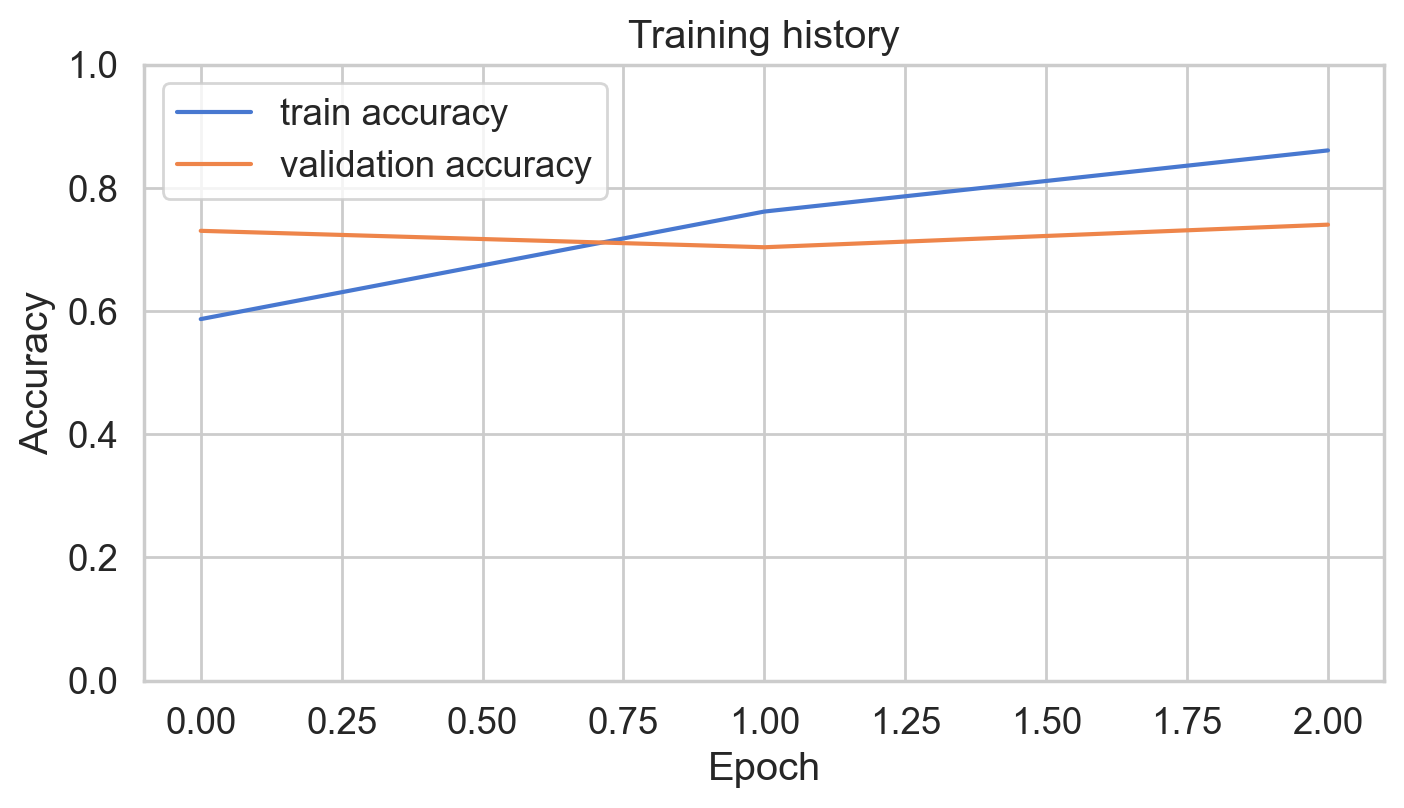

In [65]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [66]:
%%time
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

CPU times: total: 1min 8s
Wall time: 29.7 s


0.7466666666666667

In [67]:
import torch.nn.functional as F

def get_predictions(model, data_loader):
    model = model.eval()#The model is set to evaluation mode using model.eval(). 
    #This is necessary to disable dropout layers and 
    #other training-specific behaviors, ensuring the model behaves correctly during inference.
    
    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():#torch.no_grad() is used to disable gradient calculation
        for d in data_loader:#terates over batches of data from the data_loader
            texts = d["review_text"]#Extract Data from Batch
            input_ids = d["input_ids"].to(device)#input_ids, attention_mask, and targets are extracted from the batch
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(#The model performs a forward pass using input_ids and attention_mask
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)#torch.max(outputs, dim=1) returns the predicted class labels (preds). 
            #torch.max along dim=1 returns the maximum value and its index along that dimension. 
            #The index corresponds to the predicted class label.

            probs = F.softmax(outputs, dim=1)#converts the raw logits to probabilities for each class

            review_texts.extend(texts)#Store Results
            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

            print(f'batch size: {input_ids.size(0)}') # Debugging prints
            print(f'preds: {preds.size()}')
            print(f'probs: {probs.size()}')
            print(f'targets: {targets.size()}')

    predictions = torch.stack(predictions).cpu()#torch.stack is used to concatenate a sequence
    #of tensors along a new dimension. This converts the lists of tensors into single tensors.
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values#Return Results


In [68]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)
#y_review_texts: This will store the actual review texts from the test_data_loader.
#y_pred: This will store the predicted labels (classes) generated by the model.
#y_pred_probs: This will store the probabilities for each class, indicating the model's confidence in its predictions.
#y_test: This will store the true labels (targets) from the test_data_loader.    

batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch.Size([16])
batch size: 16
preds: torch.Size([16])
probs: torch.Size([16, 3])
targets: torch

In [69]:
#above step is done to get the following:
#Analyze Model Predictions: Compare y_pred (predictions) with y_test (true labels) to evaluate the model's performance.
#Calculate Metrics: Use y_pred and y_test to calculate accuracy, precision, recall, F1-score, etc.
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.75      0.79      0.77       110
     neutral       0.67      0.63      0.65       106
    positive       0.83      0.83      0.83        84

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



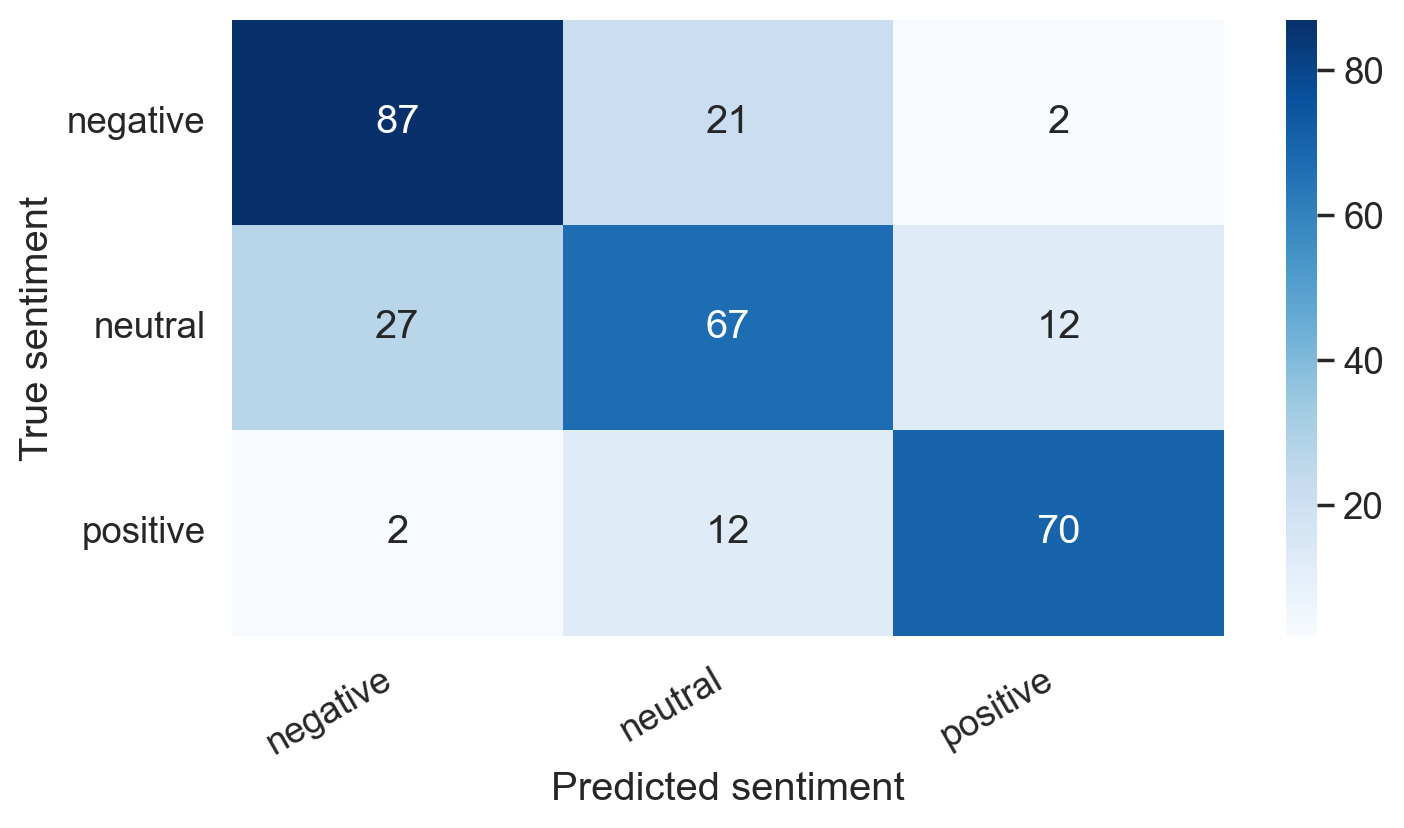

In [70]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [71]:

idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [72]:

print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')

The app keeps crashing in my Samsung m30s (android). I have sent email
and feedback also on this but there has been no resolution. Some of my
important items are written in the app but I am unable to access them
now. Very disappointed.

True sentiment: negative


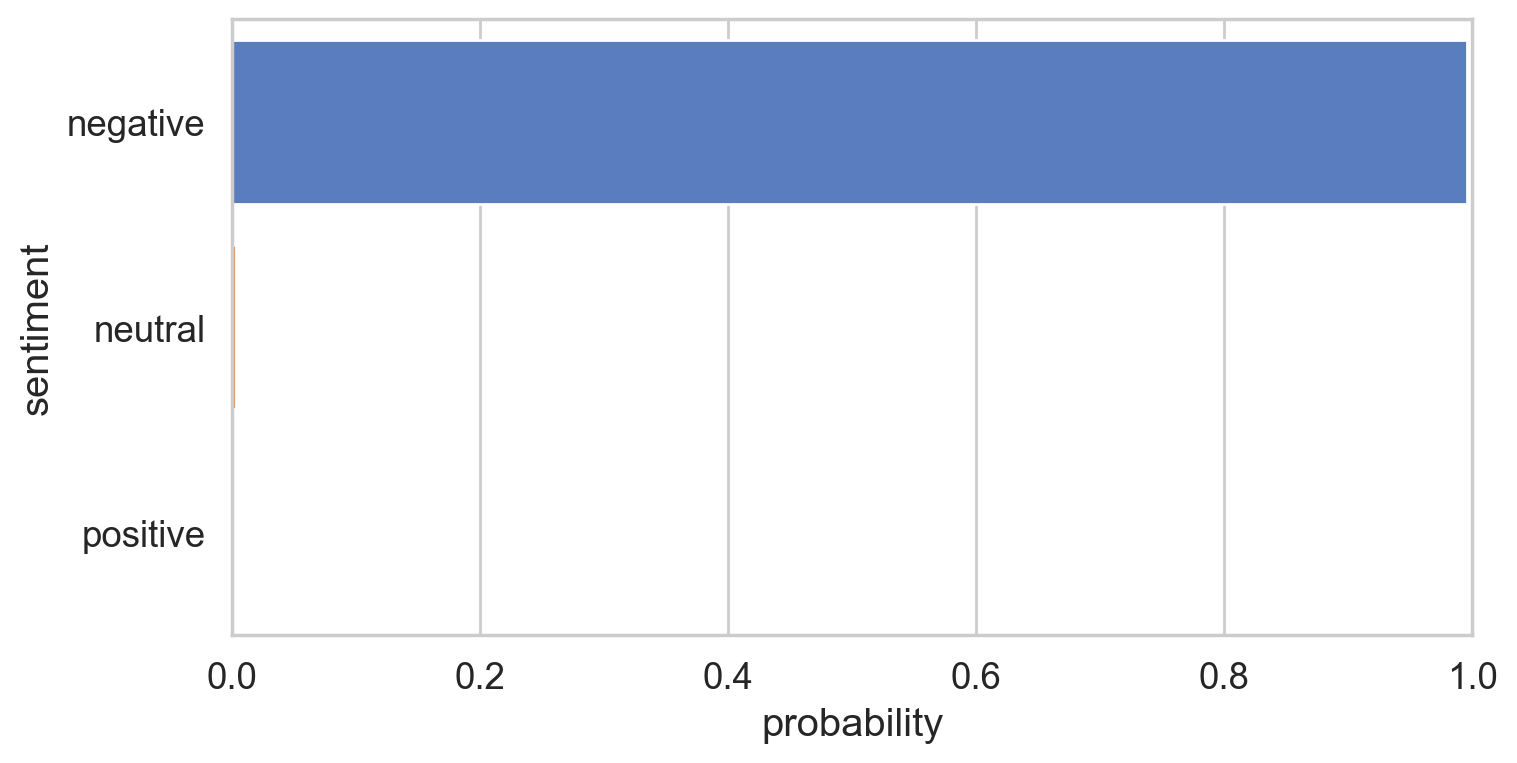

In [73]:

sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [74]:
review_text = "I love completing my todos! Best app ever!!!"# predicting on Raw Text

In [75]:

encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=50,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

C:\Users\Karthik\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [76]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : positive


In [105]:
review_text = "it is a okay app. "

In [106]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=50,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [107]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: it is a okay app. 
Sentiment  : neutral
